In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.size

7982

In [6]:
df.shape

(614, 13)

In [7]:
df=df.drop('Loan_ID',axis=1)

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Gender = le.fit_transform(df.Gender)
Married = le.fit_transform(df.Married)
Education = le.fit_transform(df.Education)
Self_Employed = le.fit_transform(df.Self_Employed)
Property_Area = le.fit_transform(df.Property_Area)


df['Gender'] = Gender
df['Married'] = Married
df['Education'] = Education
df['Self_Employed']  = Self_Employed
df['Property_Area']  = Property_Area

In [10]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


In [11]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
df = df.dropna()

In [14]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
dtype: object

In [15]:
df['Loan_Status'].value_counts()

Y    366
N    163
Name: Loan_Status, dtype: int64

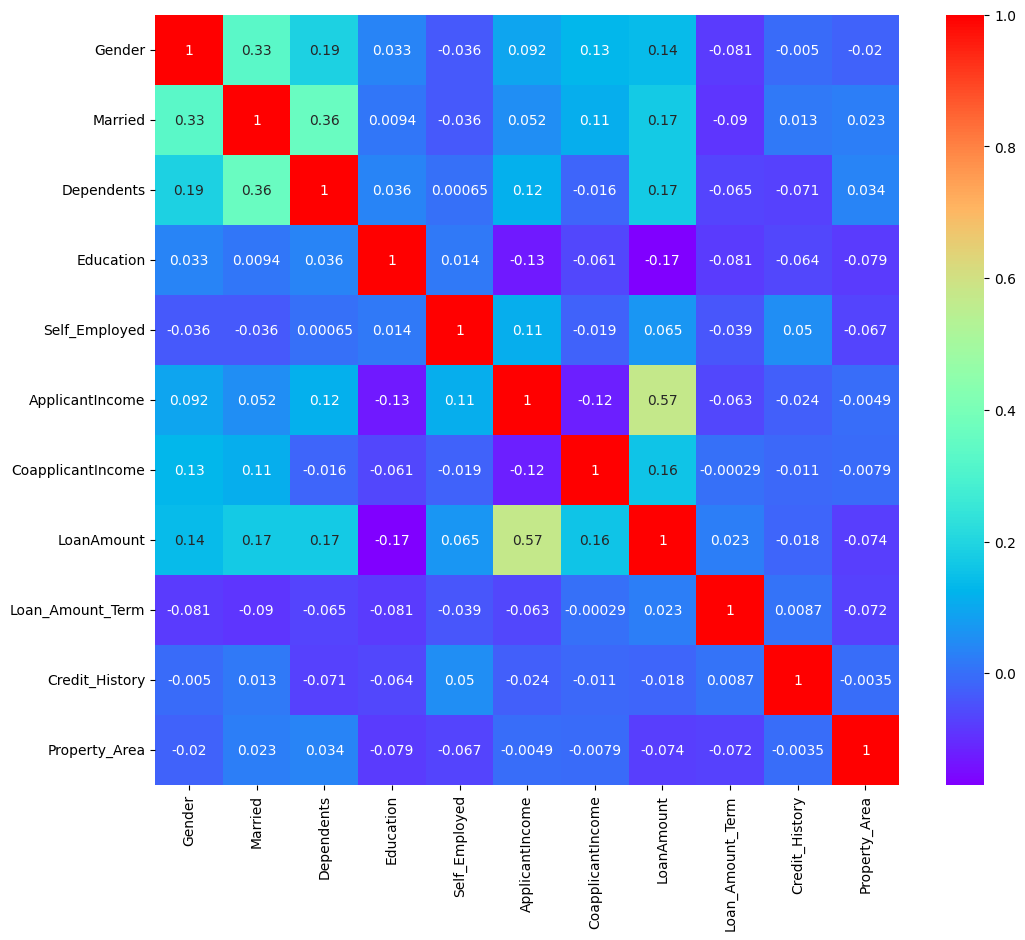

In [16]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

### Seperating features and target label

In [17]:
# features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
# target = df['label']

features = df.iloc[:,:-1]
target = df.iloc[:,-1]


In [18]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [19]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  74.52830188679245
              precision    recall  f1-score   support

           N       0.48      0.46      0.47        26
           Y       0.83      0.84      0.83        80

    accuracy                           0.75       106
   macro avg       0.65      0.65      0.65       106
weighted avg       0.74      0.75      0.74       106



In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [23]:
score

array([0.78301887, 0.75471698, 0.75471698, 0.76415094, 0.80952381])

### Saving trained Decision Tree model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.8018867924528302
              precision    recall  f1-score   support

           N       0.61      0.54      0.57        26
           Y       0.86      0.89      0.87        80

    accuracy                           0.80       106
   macro avg       0.73      0.71      0.72       106
weighted avg       0.79      0.80      0.80       106



In [26]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.79245283, 0.76415094, 0.76415094, 0.83962264, 0.81904762])

### Saving trained Guassian Naive Bayes model

In [27]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8301886792452831
              precision    recall  f1-score   support

           N       0.72      0.50      0.59        26
           Y       0.85      0.94      0.89        80

    accuracy                           0.83       106
   macro avg       0.79      0.72      0.74       106
weighted avg       0.82      0.83      0.82       106



In [29]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.68867925, 0.67924528, 0.68867925, 0.68867925, 0.6952381 ])

In [30]:
#Saving trained SVM model

In [31]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.839622641509434
              precision    recall  f1-score   support

           N       0.76      0.50      0.60        26
           Y       0.85      0.95      0.90        80

    accuracy                           0.84       106
   macro avg       0.81      0.72      0.75       106
weighted avg       0.83      0.84      0.83       106



In [33]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.81132075, 0.77358491, 0.82075472, 0.83962264, 0.81904762])

### Saving trained Logistic Regression model

In [57]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8113207547169812
              precision    recall  f1-score   support

           N       0.65      0.50      0.57        26
           Y       0.85      0.91      0.88        80

    accuracy                           0.81       106
   macro avg       0.75      0.71      0.72       106
weighted avg       0.80      0.81      0.80       106



In [36]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.79245283, 0.71698113, 0.79245283, 0.78301887, 0.78095238])

### Saving trained Random Forest model

In [37]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [38]:
data=df

Loan_Status = le.fit_transform(data.Loan_Status)
data['Loan_Status'] = Loan_Status

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
# Splitting into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state =2)

In [40]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# XGBoost

In [41]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,Y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

XGBoost's Accuracy is:  0.7547169811320755
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        26
           1       0.85      0.82      0.84        80

    accuracy                           0.75       106
   macro avg       0.67      0.68      0.68       106
weighted avg       0.76      0.75      0.76       106



In [42]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([nan, nan, nan, nan, nan])

### Saving trained XGBoost model

In [44]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

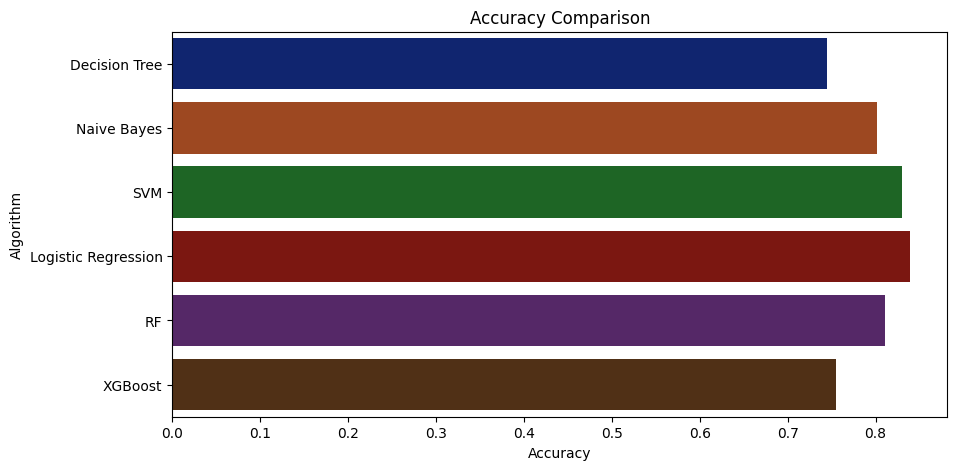

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [46]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.7452830188679245
Naive Bayes --> 0.8018867924528302
SVM --> 0.8301886792452831
Logistic Regression --> 0.839622641509434
RF --> 0.8113207547169812
XGBoost --> 0.7547169811320755


In [51]:
df
np.savetxt("test.csv", df, fmt='%s', delimiter=",")

## Making a prediction

In [52]:
data = np.array([[1,0,0,0,0,6000,0,141,360,1,2]])
prediction = LogReg.predict(data)
print(prediction[0])

Y


In [55]:
data = np.array([[1,1,3,0,0,3167,4000,180,300,0,1]])
prediction = RF.predict(data)
print(prediction[0])

N
